# Final Mark: 8.5 / 10
<ol>
<li>Very well done project which has analysed news bias from different sources
<li>The visualization has contributed a lot in drawing the conclusion
<li>Used Vader to help with the sentiment levels of the tweets
</ol>

# DS102 Group 4 Project Assignment: News Bias Analysis

## Group Members
 - Pholseya Kohsikaporn
 - Issac Yeo Kaiwen
 - Garrett Christopher Ng Junze
 - Ng Guo Rong Randy

## Table of Contents:
* I. [Problem Statement/Research Topic](#firstpoint)
* II. [Dataset and Data Preparation](#secondpoint)
    * II.i. [Web Scraping Tool](#secondpoint1)
    * II.ii. [II.ii Sentiment Analysis Tool and Parameters](#secondpoint2)
* III. [Methodology](#thirdpoint)
    * III.i. [Data Cleaning/Wrangling](#thirdpoint1)
        * III.i.a [Importing .csv files](#thirdsubpoint1)
        * III.i.b. [Removing URLs from Tweet Content](#thirdsubpoint2)
        * III.i.c. [Filtering Tweets according to Parameters](#thirdsubpoint3)
    * III.ii. [Sentiment Analysis](#thirdpoint2)
    * III.iii. [Data Visualization](#thirdpoint3)
        * III.iii.a. [Tweets by Sentiment](#thirdsubpoint4)
        * III.iii.b. [Proportion of Tweets by Sentiment](#thirdsubpoint5)
* IV. [Insights and Analysis](#fourthpoint)
        
        


## I. Problem Statement/Research Topic <a class="anchor" id="firstpoint"></a>

In recent years, the American News media as a whole has become more and more polarized along political lines. This divide is perhaps best exemplified by the dichotomy between the 'conservative-leaning' Fox News, and the 'liberal-leaning' Cable News Network (CNN). Recent events, such as the Black Lives Matter protests and the 2020 U.S. Presidential Elections, have only thrown this polarization into stark relief. To outsiders looking in, this can give the impression of receiving two parallel but completely different versions of the same events. Thus, our team feels that a project that evaluates news outlets for signs of liberal/conservative bias would be helpful in helping non-Americans evaluate events in the country.

While there have been comprehensive data science-oriented projects aimed at evaluating media bias, such as Ad Fontes Media's [Interactive Media Bias Chart](https://www.adfontesmedia.com/interactive-media-bias-chart-2/), our team would like to take a different approach. Recognizing the fact that one big aspect of engagement with news media is now through social media platforms, we propose to evaluate these outlets based on the content of their Twitter feeds. 

Our group decided to use text mining and web scraping methodologies, as well as employing available sentiment analysis tools, to analyse the tweets of the following media news outlets:
 - Fox News
 - Cable News Network (CNN)
 - MSNBC
 - The Washington Post
 
These outlets were chosen due to the popular perception of them as having a bias on either side of the political spectrum - Fox News and The Washington Post on the conservative end, CNN and MSNBC on the liberal one. 

Taking into account our project scope and timeframe, our group decided on analysing tweets from these outlets from 4th October to 4th November 2020. These dates encompassed the US 2020 Presidential elections, providing us with a sample size which would be more politically charged.

## II. Dataset and Data Preparation <a class="anchor" id="secondpoint"></a>

### II.i Web Scraping Tool <a class="anchor" id="secondpoint1"></a>

The initial challenge our group faced was deciding which Twitter scraping tool to use, as many Python libraries offer such a service. [Tweepy](https://www.tweepy.org/) and [Twython](https://twython.readthedocs.io/en/latest/) both required access to the Twitter API, which meant precious time wasted applying for a Twitter developer account. Additionally, initial scraping attempts resulted in an extremely small sample size of tweets (about 200 tweets from the date of scraping) which was unsuitable for our project scope.

Finally, our group settled on [Twint](https://github.com/twintproject/twint), a library/tool that allowed tweet-scraping without having to use the Twitter API. This provided us with 4 .csv files containing a mean sample size of about 1500 tweets per news outlet. These tweets were posted over the course of the abovementioned dates of 4th October - 4th November 2020.

### II.ii Sentiment Analysis Tool and Parameters <a class="anchor" id="secondpoint2"></a>

Our group also decided to make use of the Valence Aware Dictionary and sEntiment Reasoner, or VADER library. Once relevant tweets have been filtered out, the VADER tool would be able to analyse said tweets based on its internal rules and lexicon in order to generate a rating of how positive or negative the content of each tweet is.

We also decided to filter the results based on the American Republican and Democrat parties, as well as the presidential candidates, President Donald Trump and Democrat presidential nominee Mr. Joe Biden. In this way, we can get a sense of the media's portrayal of the Legislative and Executive branches of the U.S. government. Hence, the datasets are to be filtered and grouped by mention of one of four parameters in their content: 'Republican', 'Democrat', 'Trump' and 'Biden'.

## III. Methodology <a class="anchor" id="thirdpoint"></a>

In [1]:
import pandas as pd
import numpy as np

### III.i Data Cleaning/Wrangling <a class="anchor" id="thirdpoint1"></a>

#### III.i.a Importing .csv files <a class="anchor" id="thirdsubpoint1"></a>

The first order of business is to read the .csv files

In [83]:
#Import MSNBC dataset
msnbc_df = pd.read_csv('MSNBC_news.csv')
msnbc_df = msnbc_df[['id', 'date', 'tweet']]
msnbc_df

,id,date,tweet
0,1323775968914395136,2020-11-04 07:56:00,Oregon voters on Tuesday are considering a bal...
1,1323774990391586819,2020-11-04 07:52:06,Live now on @MSNBC: Stacey Abrams discusses v...
2,1323774710677598208,2020-11-04 07:51:00,"“I cleared my day today,” one Los Angeles vote..."
3,1323772969542389761,2020-11-04 07:44:05,Here's what to watch as the polls close Tuesda...
4,1323772889028530177,2020-11-04 07:43:45,"Multiple agencies, including the FBI, are inve..."
...,...,...,...
3415,1312185981450117120,2020-10-03 08:21:31,JUST IN: Sen. Tillis says he has tested positi...
3416,1312185975041261569,2020-10-03 08:21:30,"""We face many threats across the world,"" Rep. ..."
3417,1312185864068370432,2020-10-03 08:21:03,“We know that Russia is a master at disinforma...
3418,1312181637342355457,2020-10-03 08:04:16,Senate Judiciary Cmte. chairman Lindsey Graham...


In [84]:
# Import CNN dataset
cnn_df = pd.read_csv('CNN_news.csv')
cnn_df = cnn_df[['id', 'date', 'tweet']]
cnn_df

,id,date,tweet
0,1323773226938454022,2020-11-04 07:45:06,There's a lot to keep track of tonight. See wh...
1,1323769480372195332,2020-11-04 07:30:13,Democrats aim to flip the Senate after six yea...
2,1323766172806975489,2020-11-04 07:17:04,President Trump will watch election results in...
3,1323763168364105730,2020-11-04 07:05:08,A 99-year-old man who was born to a sharecropp...
4,1323760638896865282,2020-11-04 06:55:05,The Phoenix area could see the highest turnout...
...,...,...,...
1871,1312197192275247106,2020-10-03 09:06:04,There will be more space between Vice Presiden...
1872,1312193425479852033,2020-10-03 08:51:06,The Trump campaign won't pull down its negativ...
1873,1312189643723476993,2020-10-03 08:36:05,NEW: Republican Sen. Thom Tillis of North Caro...
1874,1312185636040785920,2020-10-03 08:20:09,President Trump's coronavirus diagnosis raises...


In [85]:
# Import Fox News dataset
fox_df = pd.read_csv('FOX_news.csv')
fox_df = fox_df[['id', 'date', 'tweet']]
fox_df

,id,date,tweet
0,1323776363636101128,2020-11-04 07:57:34,Newsom says California could move to all mail-...
1,1323772925313458179,2020-11-04 07:43:54,Karl Rove: A lot of Senate races are ‘close as...
2,1323772511868379137,2020-11-04 07:42:15,Where are Trump and Biden watching election re...
3,1323772313037361152,2020-11-04 07:41:28,Fox News kicks off Democracy 2020 Election Nig...
4,1323768195690516482,2020-11-04 07:25:06,Massachusetts' Republican Gov. reveals he left...
...,...,...,...
697,1312383161091985408,2020-10-03 21:25:03,https://t.co/KZdKccaD8V
698,1312376779890397191,2020-10-03 20:59:41,https://t.co/iL4FMmxxqO
699,1312349233052372992,2020-10-03 19:10:14,https://t.co/lHmqDuzCOq
700,1312197825657139205,2020-10-03 09:08:35,https://t.co/GFcmBVbIZU


In [86]:
# Import The Washington Post dataset
washpost_df = pd.read_csv('WashPost_news.csv')
washpost_df = washpost_df[['id', 'date', 'tweet']]
washpost_df

,id,date,tweet
0,1323761483801632769,2020-11-04 06:58:26,Biden takes nostalgic journey amid a search fo...
1,1323749034482376706,2020-11-04 06:08:58,Trump’s first term has been defined by stabili...
2,1323741715031797760,2020-11-04 05:39:53,Supreme Court debates what judges must find be...
3,1323736108581163010,2020-11-04 05:17:36,She came to the U.S. from Mexico 44 years ago....
4,1323728711192031233,2020-11-04 04:48:13,"With all eyes on Pennsylvania, long lines at p..."
...,...,...,...
571,1312349129780219904,2020-10-03 19:09:49,Trump said solving the opioid crisis was a top...
572,1312237570353516545,2020-10-03 11:46:31,Notre Dame faculty who attended White House ev...
573,1312217783875391488,2020-10-03 10:27:54,What the White House and Trump allies said abo...
574,1312192477030313986,2020-10-03 08:47:20,Invincibility punctured by infection: How the ...


#### III.i.b. Removing URLs from Tweet Content <a class="anchor" id="thirdsubpoint2"></a>

Most tweets by mainstream media outlets also contain URLs linking to the full article on their website. We proceeded to remove the URLs in order to trim the bloat from our dataset as well as focus the analysis purely on the Tweet content.

In [22]:
#remove url links 
msnbc_df['tweet'] = msnbc_df['tweet'].replace(r"http\S+", "", regex=True).astype(str)
cnn_df['tweet'] = cnn_df['tweet'].replace(r"http\S+", "", regex=True).astype(str)
fox_df['tweet'] = fox_df['tweet'].replace(r"http\S+", "", regex=True).astype(str)
washpost_df['tweet'] = washpost_df['tweet'].replace(r"http\S+", "", regex=True).astype(str)

In [23]:
print("MSNBC:", msnbc_df['tweet'][0])
print("CNN:", cnn_df['tweet'][0])
print("FOX News:", fox_df['tweet'][0])
print("The Washington Post:", washpost_df['tweet'][0])

MSNBC: Oregon voters on Tuesday are considering a ballot measure that would decriminalize possession of small amounts of hard drugs such as heroin and cocaine.  
CNN: There's a lot to keep track of tonight. See which races CNN's anchors and analysts are watching and pick your own to follow with our My Election feature   #CNNElection  
FOX News: Newsom says California could move to all mail-in voting   
The Washington Post: Biden takes nostalgic journey amid a search for votes  


#### III.i.c. Filtering Tweets according to Parameters <a class="anchor" id="thirdsubpoint3"></a>

The last data wrangling step is to filter the sample tweets for those containing the four keywords listed in section II.ii., in order to prep for the sentiment analysis and data visualization steps. 

In [24]:
#grouping tweets according to the keywords (trump, biden, republican, democrat)
keyword = ['Trump', 'Biden', 'Republican', 'Democrat']
keyword_index = 0
data = []

for word in keyword:
    msnbc_df['target'] = keyword[keyword_index] #assigning a tag to tweets belonging to respective group
    msnbc_df['relevant_tweet'] = np.where(msnbc_df['tweet'].str.contains(keyword[keyword_index], case=False, na=False), 1, 0)
    temp_df = msnbc_df[msnbc_df['relevant_tweet']==1]
    data.append(temp_df)
    keyword_index += 1

msnbc_relevant_df = pd.concat(data).reset_index()
msnbc_relevant_df

,index,id,date,tweet,target,relevant_tweet
0,8,1323765397309501441,2020-11-04 07:13:59,"""The most immediate problems on this map for D...",Trump,1
1,11,1323762143808901120,2020-11-04 07:01:04,"Fmr. National Security Adviser Susan Rice: ""Th...",Trump,1
2,15,1323754592786620417,2020-11-04 06:31:03,“It’s very telling that Donald Trump is focuse...,Trump,1
3,17,1323747566434111494,2020-11-04 06:03:08,.@MaddowBlog: Pres. Trump reportedly expects s...,Trump,1
4,18,1323742767974141953,2020-11-04 05:44:04,"Symone Sanders, senior adviser to Joe Biden, s...",Trump,1
...,...,...,...,...,...,...
2023,3319,1312506475986575360,2020-10-04 05:35:03,All 10 Democrats on the Senate Judiciary Cmte....,Democrat,1
2024,3354,1312388709317259264,2020-10-03 21:47:05,North Carolina Democratic Senate candidate Cal...,Democrat,1
2025,3361,1312362273009291265,2020-10-03 20:02:03,"“If the president can get it, anyone can get i...",Democrat,1
2026,3369,1312327045096054785,2020-10-03 17:42:04,"Democrats know they need to walk a fine line, ...",Democrat,1


In [25]:
keyword = ['Trump', 'Biden', 'Republican', 'Democrat']
keyword_index = 0
data = []

for word in keyword:
    cnn_df['target'] = keyword[keyword_index] #assigning a tag to tweets belonging to respective group
    cnn_df['relevant_tweet'] = np.where(cnn_df['tweet'].str.contains(keyword[keyword_index], case=False, na=False), 1, 0)
    temp_df = cnn_df[cnn_df['relevant_tweet']==1]
    data.append(temp_df)
    keyword_index += 1

cnn_relevant_df = pd.concat(data).reset_index()
cnn_relevant_df

,index,id,date,tweet,target,relevant_tweet
0,2,1323766172806975489,2020-11-04 07:17:04,President Trump will watch election results in...,Trump,1
1,8,1323738238645870597,2020-11-04 05:26:04,Donald Trump and Joe Biden await their fates a...,Trump,1
2,20,1323691178815082496,2020-11-04 02:19:04,"Joe Biden is in Pennsylvania today, and Presid...",Trump,1
3,22,1323684140508696576,2020-11-04 01:51:06,Donald Trump's final campaign pitch is a false...,Trump,1
4,37,1323627269714313216,2020-11-03 22:05:07,Dr. Deborah Birx of the White House coronaviru...,Trump,1
...,...,...,...,...,...,...
1308,1776,1313275044487983104,2020-10-06 08:29:04,Trump campaign cancels its planned television ...,Democrat,1
1309,1779,1313263715240869888,2020-10-06 07:44:03,"After early victories, Democrats' voting lawsu...",Democrat,1
1310,1786,1313232019275603970,2020-10-06 05:38:06,Democrats ask State Department to turn over re...,Democrat,1
1311,1824,1312837913776971777,2020-10-05 03:32:04,Latest Senate and House ratings are good news ...,Democrat,1


In [26]:
keyword = ['Trump', 'Biden', 'Republican', 'Democrat']
keyword_index = 0
data = []

for word in keyword:
    fox_df['target'] = keyword[keyword_index] #assigning a tag to tweets belonging to respective group
    fox_df['relevant_tweet'] = np.where(fox_df['tweet'].str.contains(keyword[keyword_index], case=False, na=False), 1, 0)
    temp_df = fox_df[fox_df['relevant_tweet']==1]
    data.append(temp_df)
    keyword_index += 1

fox_relevant_df = pd.concat(data).reset_index()
fox_relevant_df

,index,id,date,tweet,target,relevant_tweet
0,2,1323772511868379137,2020-11-04 07:42:15,Where are Trump and Biden watching election re...,Trump,1
1,25,1323741876407721985,2020-11-04 05:40:31,Trump VS. Biden on health care - here's where ...,Trump,1
2,27,1323741122175389696,2020-11-04 05:37:32,ELECTION NIGHT PEP-TALK: Trump addresses campa...,Trump,1
3,28,1323737225012662272,2020-11-04 05:22:02,"DOWN TO THE WIRE: Trump, Biden still firing of...",Trump,1
4,35,1323690921716830208,2020-11-04 02:18:03,"NYPD union endorses Trump, says president has ...",Trump,1
...,...,...,...,...,...,...
330,485,1315832792887054339,2020-10-13 09:52:39,EXCLUSIVE: California hires Democratic operati...,Democrat,1
331,489,1315764854993678336,2020-10-13 05:22:41,Polls showing big Biden lead 'have massive ove...,Democrat,1
332,506,1315649159140118529,2020-10-12 21:42:57,ACB hearing kicks off as Chairman Graham makes...,Democrat,1
333,534,1314981704650698754,2020-10-11 01:30:44,Democratic nominee Joe Biden said voters don’t...,Democrat,1


In [27]:
keyword = ['Trump', 'Biden', 'Republican', 'Democrat']
keyword_index = 0
data = []

for word in keyword:
    washpost_df['target'] = keyword[keyword_index] #assigning a tag to tweets belonging to respective group
    washpost_df['relevant_tweet'] = np.where(washpost_df['tweet'].str.contains(keyword[keyword_index], case=False, na=False), 1, 0)
    temp_df = washpost_df[washpost_df['relevant_tweet']==1]
    data.append(temp_df)
    keyword_index += 1

washpost_relevant_df = pd.concat(data).reset_index()
washpost_relevant_df

,index,id,date,tweet,target,relevant_tweet
0,1,1323749034482376706,2020-11-04 06:08:58,Trump’s first term has been defined by stabili...,Trump,1
1,7,1323699811602845696,2020-11-04 02:53:22,"Trump’s and Biden’s paths to victory, explained",Trump,1
2,10,1323686050473140225,2020-11-04 01:58:41,"Over the course of 48 hours, most of Trump’s f...",Trump,1
3,19,1323584271706132481,2020-11-03 19:14:16,Election 2020 live updates: Trump to make Elec...,Trump,1
4,25,1323425215192408067,2020-11-03 08:42:14,Top Trump adviser pleads for ‘more aggressive ...,Trump,1
...,...,...,...,...,...,...
421,434,1314967878177902594,2020-10-11 00:35:47,"Prospects for more stimulus checks, coronaviru...",Democrat,1
422,438,1314704545621180425,2020-10-10 07:09:24,"Trump, lagging in polls, pressures Justice Dep...",Democrat,1
423,489,1313959239489064960,2020-10-08 05:47:49,"In call with Democratic senator, Barrett decli...",Democrat,1
424,547,1313070645236953088,2020-10-05 18:56:52,A sexting scandal in the North Carolina Senate...,Democrat,1


### III.ii. Sentiment Analysis <a class="anchor" id="thirdpoint2"></a>

As mentioned, we elected to use the VADER sentiment analysis tool in our work, and therefore need to install and import it. 

In [11]:
# pip install vaderSentiment

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

With VADER installed, we can start the analysis process, by using the `SentimentIntensityAnalyser()` object.

In [58]:
analyser = SentimentIntensityAnalyzer()

#MSNBC
sentiment1 = msnbc_relevant_df['tweet'].apply(lambda x: analyser.polarity_scores(x))
sent1_df = pd.DataFrame(sentiment1.tolist()) #converting a list of dictionaries into a dataframe

#CNN
sentiment2 = cnn_relevant_df['tweet'].apply(lambda x: analyser.polarity_scores(x))
sent2_df = pd.DataFrame(sentiment2.tolist()) 

#FOX News
sentiment3 = fox_relevant_df['tweet'].apply(lambda x: analyser.polarity_scores(x))
sent3_df = pd.DataFrame(sentiment3.tolist()) 

#The Washington Post
sentiment4 = washpost_relevant_df['tweet'].apply(lambda x: analyser.polarity_scores(x))
sent4_df = pd.DataFrame(sentiment4.tolist()) 

With the analysis done, we proceed to organize the analysed data into Dataframes.

In [59]:
msnbc_sent_df = pd.concat([msnbc_relevant_df, sent1_df], axis=1)
msnbc_sent_df = msnbc_sent_df.drop(columns=['index', 'date', 'relevant_tweet'])
msnbc_sent_df.loc[msnbc_sent_df['compound'] > 0, 'sentiment'] = 'Positive'
msnbc_sent_df.loc[msnbc_sent_df['compound'] == 0, 'sentiment'] = 'Neutral'
msnbc_sent_df.loc[msnbc_sent_df['compound'] < 0, 'sentiment'] = 'Negative'

In [60]:
cnn_sent_df = pd.concat([cnn_relevant_df, sent2_df], axis=1)
cnn_sent_df = cnn_sent_df.drop(columns=['index', 'date', 'relevant_tweet'])
cnn_sent_df.loc[cnn_sent_df['compound'] > 0, 'sentiment'] = 'Positive'
cnn_sent_df.loc[cnn_sent_df['compound'] == 0, 'sentiment'] = 'Neutral'
cnn_sent_df.loc[cnn_sent_df['compound'] < 0, 'sentiment'] = 'Negative'

In [61]:
fox_sent_df = pd.concat([fox_relevant_df, sent3_df], axis=1)
fox_sent_df = fox_sent_df.drop(columns=['index', 'date', 'relevant_tweet'])
fox_sent_df.loc[fox_sent_df['compound'] > 0, 'sentiment'] = 'Positive'
fox_sent_df.loc[fox_sent_df['compound'] == 0, 'sentiment'] = 'Neutral'
fox_sent_df.loc[fox_sent_df['compound'] < 0, 'sentiment'] = 'Negative'

In [62]:
washpost_sent_df = pd.concat([washpost_relevant_df, sent4_df], axis=1)
washpost_sent_df = washpost_sent_df.drop(columns=['index', 'date', 'relevant_tweet'])
washpost_sent_df.loc[washpost_sent_df['compound'] > 0, 'sentiment'] = 'Positive'
washpost_sent_df.loc[washpost_sent_df['compound'] == 0, 'sentiment'] = 'Neutral'
washpost_sent_df.loc[washpost_sent_df['compound'] < 0, 'sentiment'] = 'Negative'

Finally, we split the tweets according to keyword before moving on to visualize the data.

In [63]:
msnbc_trump_df = msnbc_sent_df[msnbc_sent_df['target'] == 'Trump'] 
msnbc_biden_df = msnbc_sent_df[msnbc_sent_df['target'] == 'Biden']
msnbc_rep_df = msnbc_sent_df[msnbc_sent_df['target'] == 'Republican']
msnbc_dem_df = msnbc_sent_df[msnbc_sent_df['target'] == 'Democrat']

In [64]:
cnn_trump_df = cnn_sent_df[cnn_sent_df['target'] == 'Trump'] 
cnn_biden_df = cnn_sent_df[cnn_sent_df['target'] == 'Biden']
cnn_rep_df = cnn_sent_df[cnn_sent_df['target'] == 'Republican']
cnn_dem_df = cnn_sent_df[cnn_sent_df['target'] == 'Democrat']

In [65]:
fox_trump_df = fox_sent_df[fox_sent_df['target'] == 'Trump'] 
fox_biden_df = fox_sent_df[fox_sent_df['target'] == 'Biden']
fox_rep_df = fox_sent_df[fox_sent_df['target'] == 'Republican']
fox_dem_df = fox_sent_df[fox_sent_df['target'] == 'Democrat']

In [66]:
washpost_trump_df = washpost_sent_df[washpost_sent_df['target'] == 'Trump'] 
washpost_biden_df = washpost_sent_df[washpost_sent_df['target'] == 'Biden']
washpost_rep_df = washpost_sent_df[washpost_sent_df['target'] == 'Republican']
washpost_dem_df = washpost_sent_df[washpost_sent_df['target'] == 'Democrat']

### III.iii. Data Visualization <a class="anchor" id="thirdpoint3"></a>

#### III.iii.a. Tweets by Sentiment <a class="anchor" id="thirdsubpoint4"></a>

We will visualize a set of data for each media outlet to show the number of tweets made with each of the four keywords, splitting the tweets by positive, negative or neutral sentiment. 

__MSNBC__

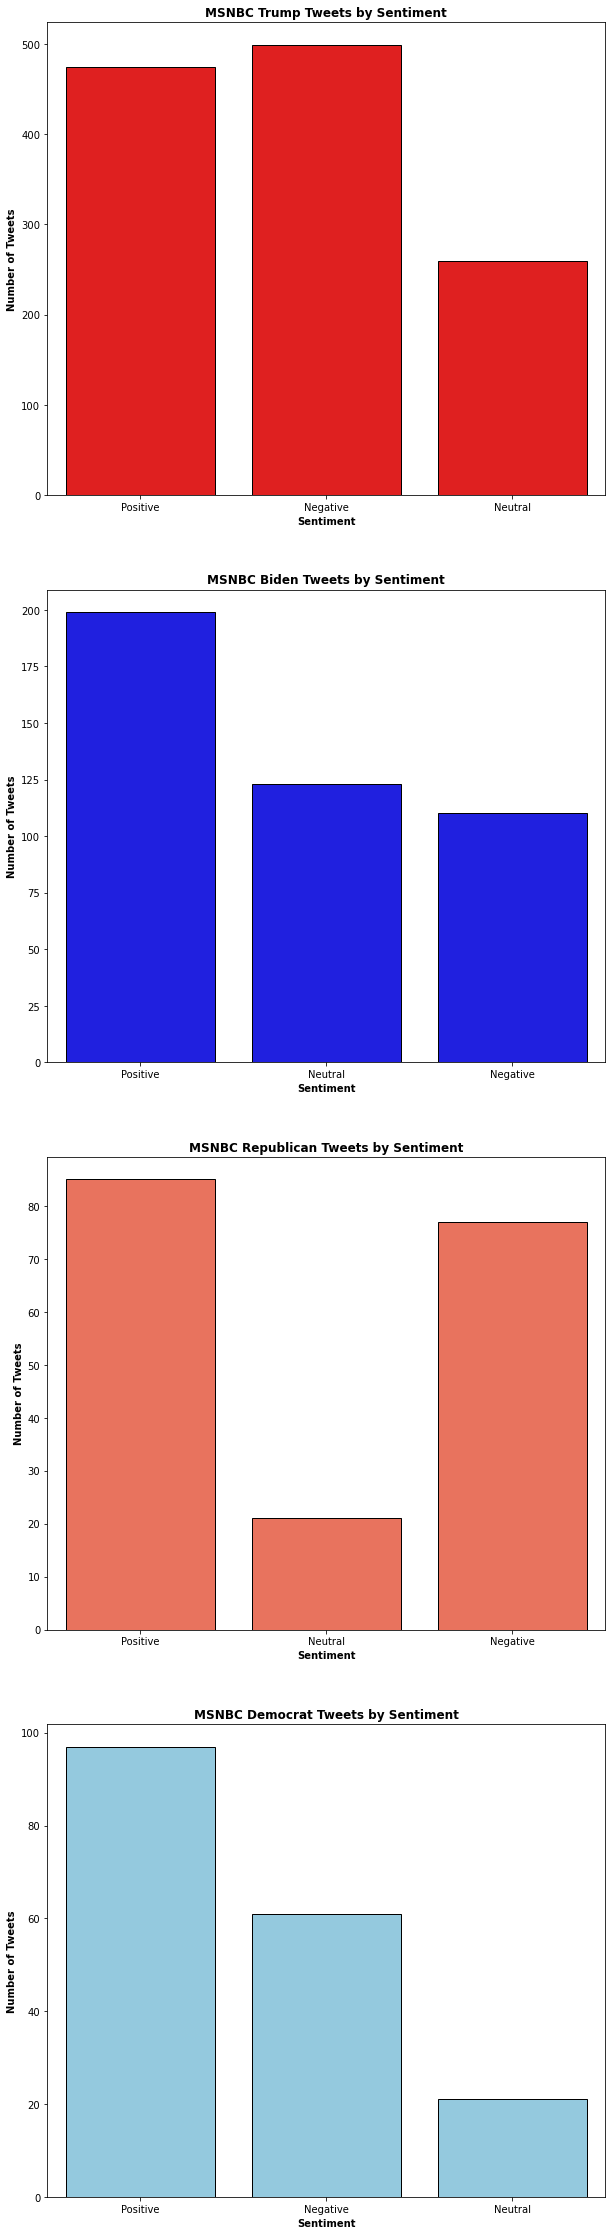

In [77]:
import seaborn as sns 
import matplotlib.pyplot as plt

msnbc_final_data = [msnbc_trump_df, msnbc_biden_df, msnbc_rep_df, msnbc_dem_df]
colors = ['red','blue','tomato','skyblue']

i = 0 #index

fig = plt.figure(figsize=(10,40))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax_list = [ax1, ax2, ax3, ax4]

for df in msnbc_final_data:
    sns.countplot(x='sentiment', data= msnbc_final_data[i], edgecolor ='black', color=colors[i], ax=ax_list[i])
    ax_list[i].set_ylabel('Number of Tweets', fontweight ='bold')
    ax_list[i].set_xlabel('Sentiment', fontweight ='bold')
    ax_list[i].set_title('MSNBC ' + keyword[i] + ' Tweets by Sentiment', fontweight ='bold')
    i += 1
    
plt.show()

__CNN__

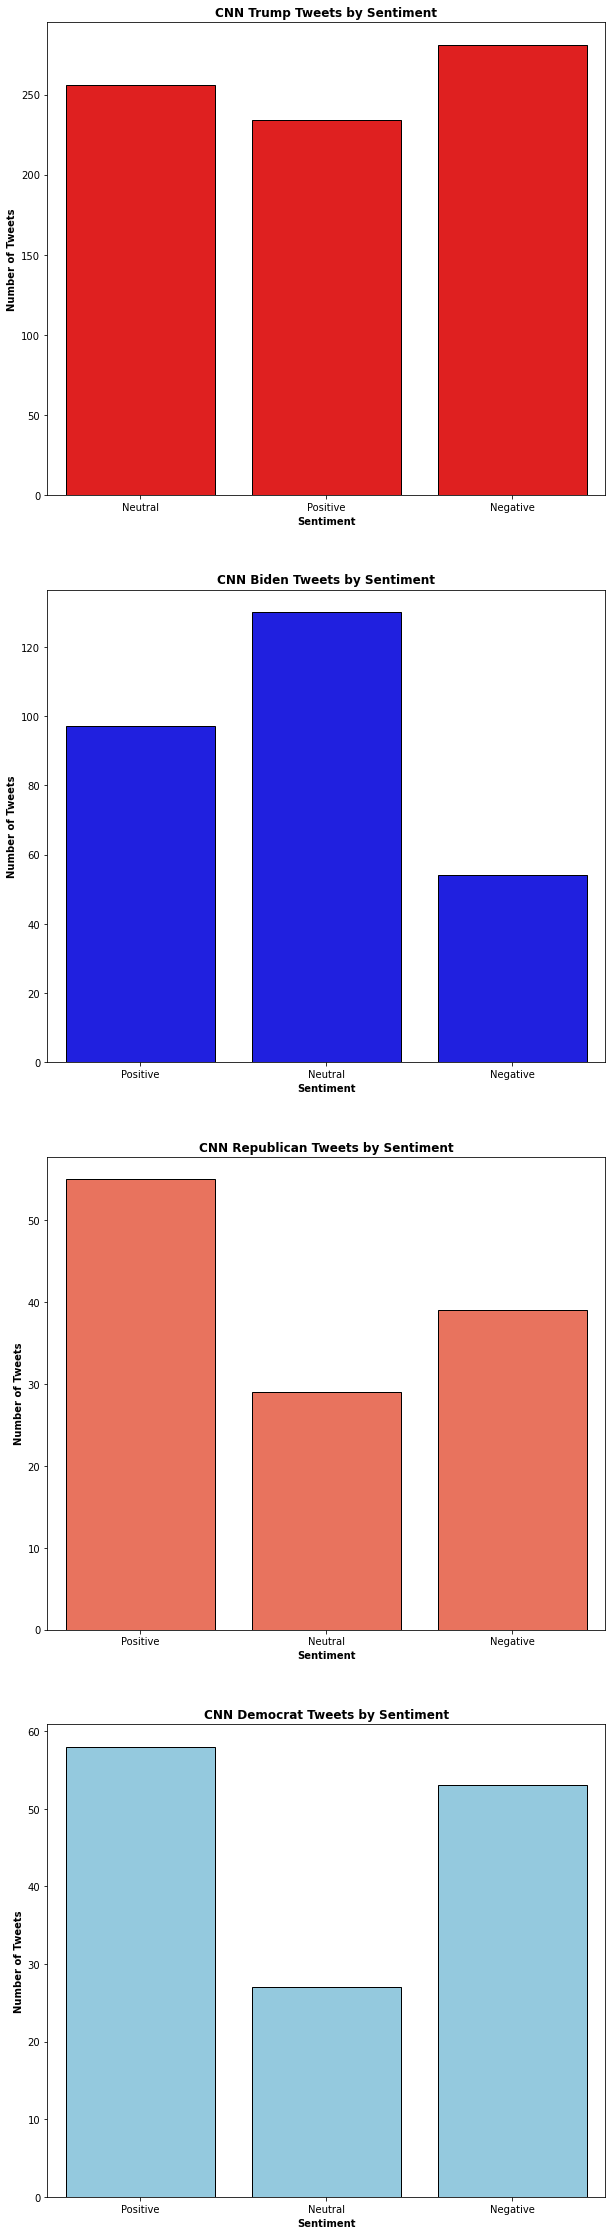

In [76]:
import seaborn as sns 
import matplotlib.pyplot as plt

cnn_final_data = [cnn_trump_df, cnn_biden_df, cnn_rep_df, cnn_dem_df]
colors = ['red','blue','tomato','skyblue']

i = 0 #index

fig = plt.figure(figsize=(10,40))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax_list = [ax1, ax2, ax3, ax4]

for df in cnn_final_data:
    sns.countplot(x='sentiment', data= cnn_final_data[i], edgecolor ='black', color=colors[i], ax=ax_list[i])
    ax_list[i].set_ylabel('Number of Tweets', fontweight ='bold')
    ax_list[i].set_xlabel('Sentiment', fontweight ='bold')
    ax_list[i].set_title('CNN ' + keyword[i] + ' Tweets by Sentiment', fontweight ='bold')
    i += 1
    
plt.show()

__Fox News__

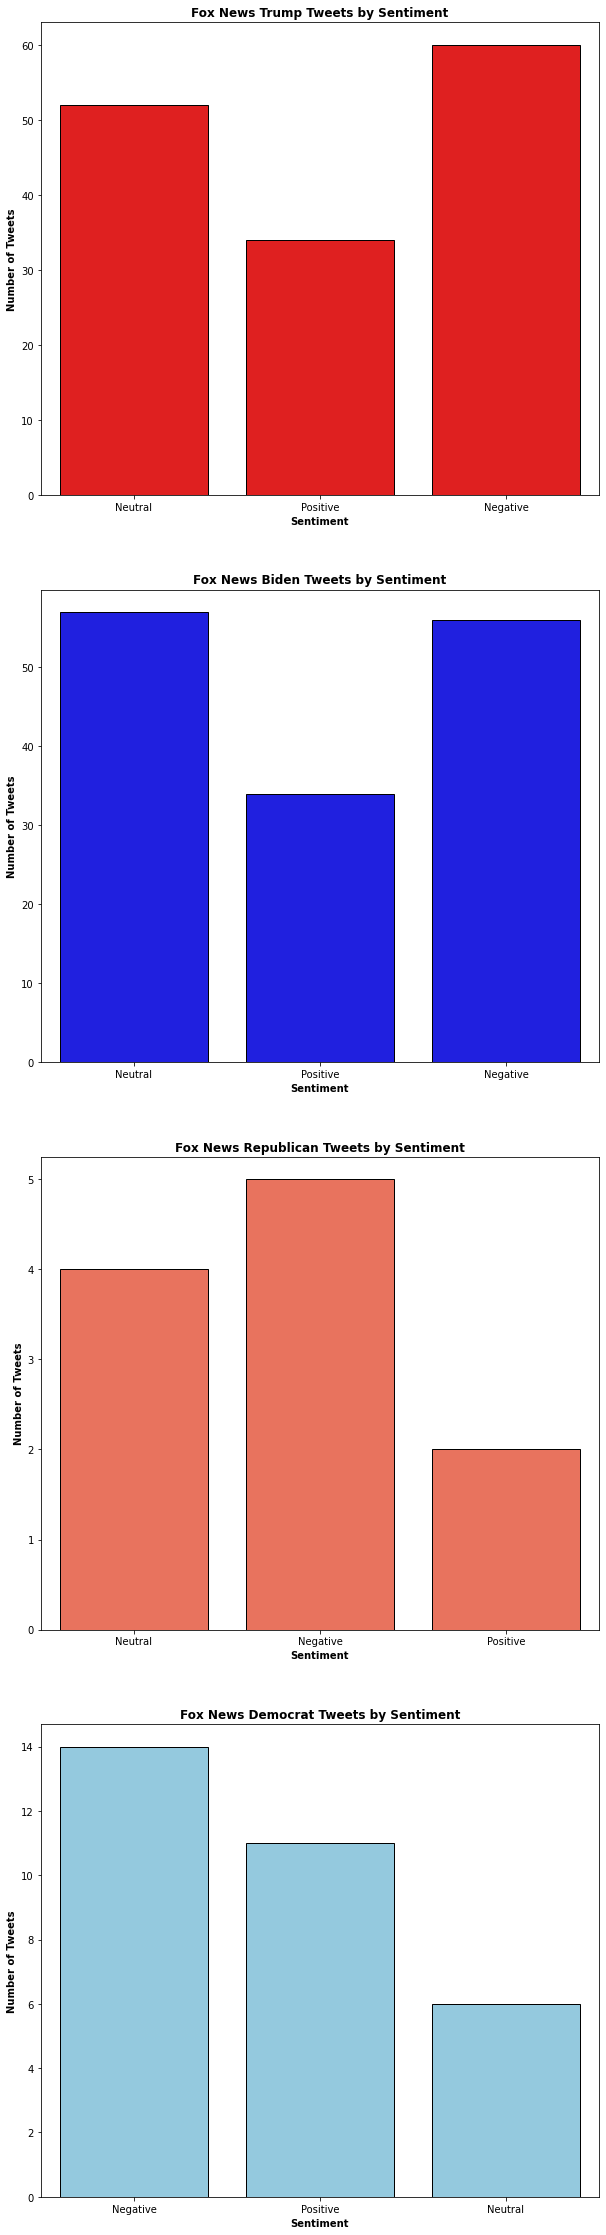

In [75]:
import seaborn as sns 
import matplotlib.pyplot as plt

fox_final_data = [fox_trump_df, fox_biden_df, fox_rep_df, fox_dem_df]
colors = ['red','blue','tomato','skyblue']

i = 0 #index

fig = plt.figure(figsize=(10,40))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax_list = [ax1, ax2, ax3, ax4]

for df in fox_final_data:
    sns.countplot(x='sentiment', data= fox_final_data[i], edgecolor ='black', color=colors[i], ax=ax_list[i])
    ax_list[i].set_ylabel('Number of Tweets', fontweight ='bold')
    ax_list[i].set_xlabel('Sentiment', fontweight ='bold')
    ax_list[i].set_title('Fox News ' + keyword[i] + ' Tweets by Sentiment', fontweight ='bold')
    i += 1
    
plt.show()

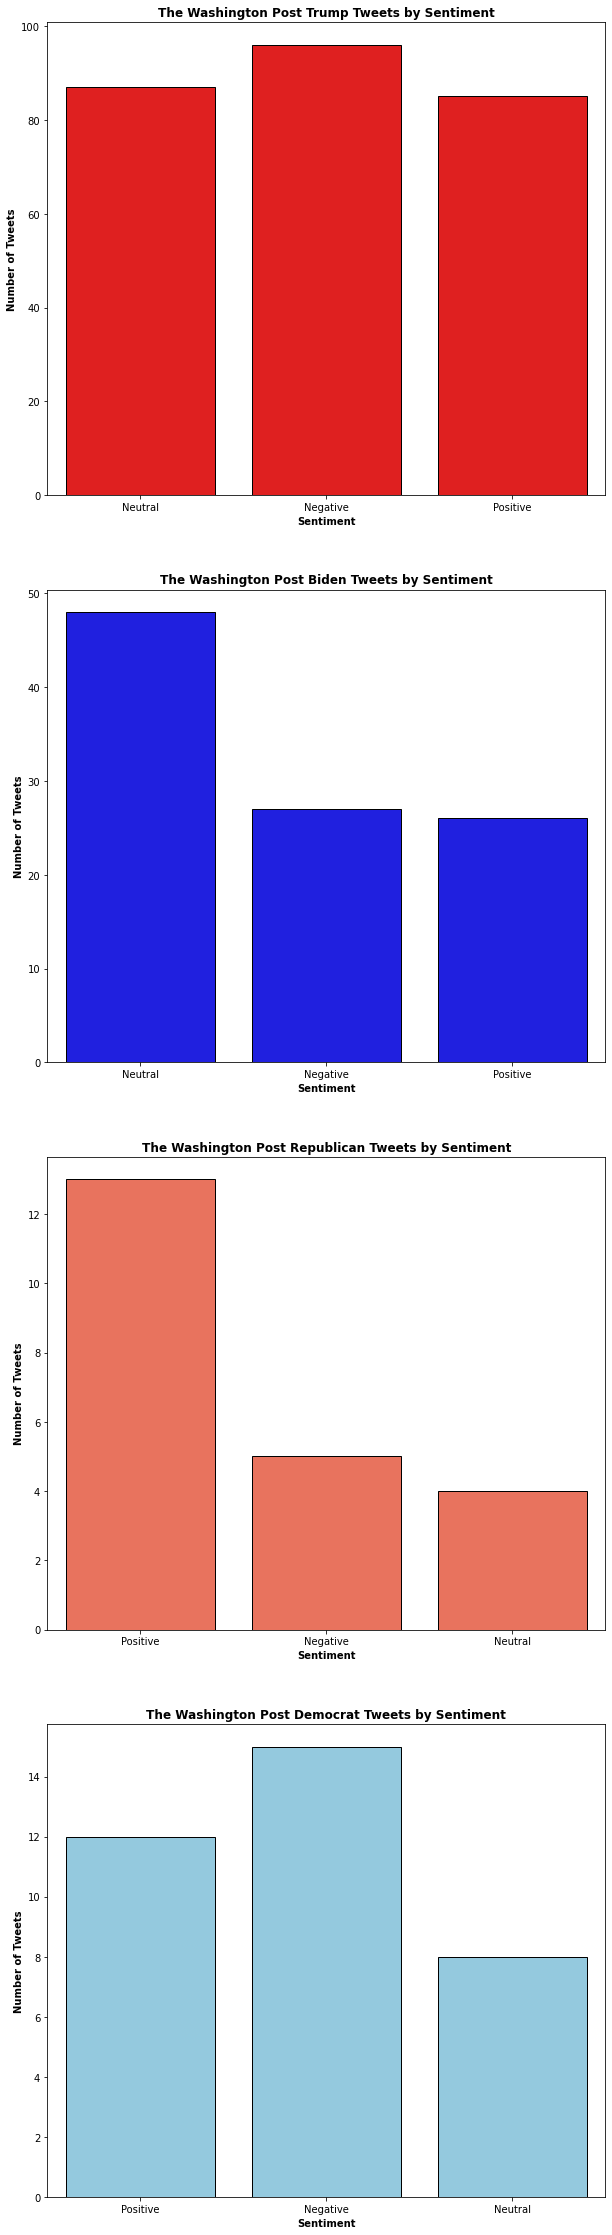

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt

washpost_final_data = [washpost_trump_df, washpost_biden_df, washpost_rep_df, washpost_dem_df]
colors = ['red','blue','tomato','skyblue']

i = 0 #index

fig = plt.figure(figsize=(10,40))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax_list = [ax1, ax2, ax3, ax4]

for df in washpost_final_data:
    sns.countplot(x='sentiment', data= washpost_final_data[i], edgecolor ='black', color=colors[i], ax=ax_list[i])
    ax_list[i].set_ylabel('Number of Tweets', fontweight ='bold')
    ax_list[i].set_xlabel('Sentiment', fontweight ='bold')
    ax_list[i].set_title('The Washington Post ' + keyword[i] + ' Tweets by Sentiment', fontweight ='bold')
    i += 1
    
plt.show()

#### III.iii.b. Proportion of Tweets by Sentiment <a class="anchor" id="thirdsubpoint5"></a>

Next we will visualize the proportion of tweets by sentiment, comparing the sentiment analysis of Mr. Trump against Mr. Biden, as well as between that of the Republican and Democrat parties.

__MSNBC__

In [56]:
i = 0
prop_list = [] #trump, biden, rep, dem

for df in msnbc_final_data:
    prop = msnbc_final_data[i].groupby('sentiment').size()/len(msnbc_final_data[i])
    prop_list.append(prop)
    
    i += 1

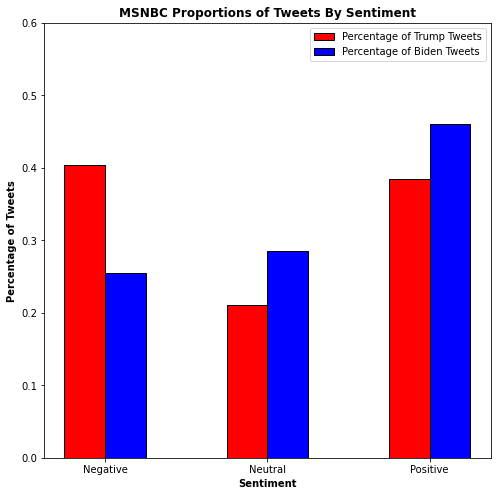

In [88]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_list[0], color ='red', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_list[1], color ='blue', width = bar_width, 
            edgecolor ='black', label ='Biden') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 0.6)
plt.title('MSNBC Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

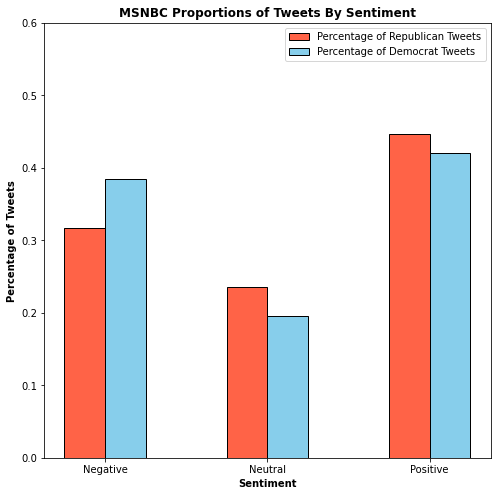

In [92]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

r = plt.bar(br1, prop_list[2], color ='tomato', width = bar_width, 
            edgecolor ='black', label ='Republican') 
d = plt.bar(br2, prop_list[-1], color ='skyblue', width = bar_width, 
            edgecolor ='black', label ='Democrat') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([r,d],['Percentage of Republican Tweets','Percentage of Democrat Tweets'])
plt.ylim(0.0, 0.6)
plt.title('MSNBC Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

__CNN__

In [89]:
i = 0
prop_list = [] #trump, biden, rep, dem

for df in cnn_final_data:
    prop = cnn_final_data[i].groupby('sentiment').size()/len(cnn_final_data[i])
    prop_list.append(prop)
    
    i += 1

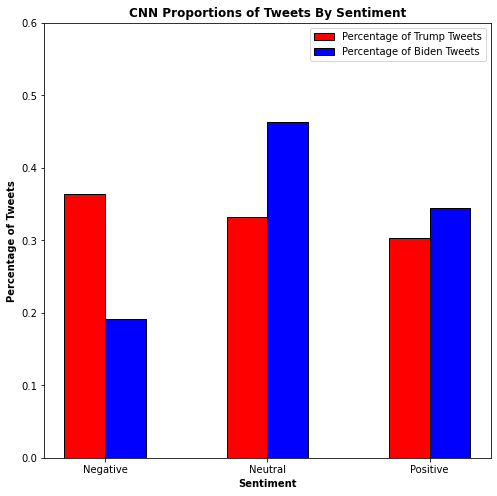

In [90]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_list[0], color ='red', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_list[1], color ='blue', width = bar_width, 
            edgecolor ='black', label ='Biden') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 0.6)
plt.title('CNN Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

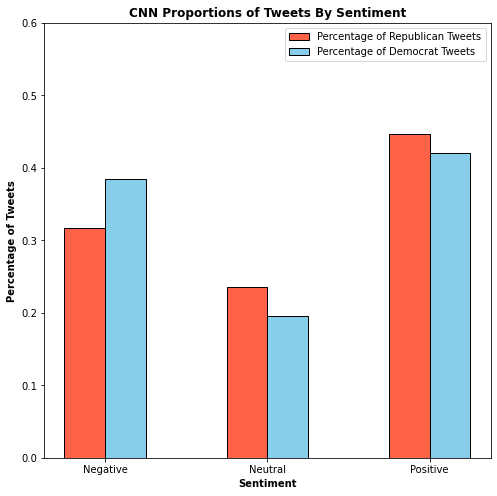

In [91]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

r = plt.bar(br1, prop_list[2], color ='tomato', width = bar_width, 
            edgecolor ='black', label ='Republican') 
d = plt.bar(br2, prop_list[-1], color ='skyblue', width = bar_width, 
            edgecolor ='black', label ='Democrat') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([r,d],['Percentage of Republican Tweets','Percentage of Democrat Tweets'])
plt.ylim(0.0, 0.6)
plt.title('CNN Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

__Fox News__

In [93]:
i = 0
prop_list = [] #trump, biden, rep, dem

for df in fox_final_data:
    prop = fox_final_data[i].groupby('sentiment').size()/len(fox_final_data[i])
    prop_list.append(prop)
    
    i += 1

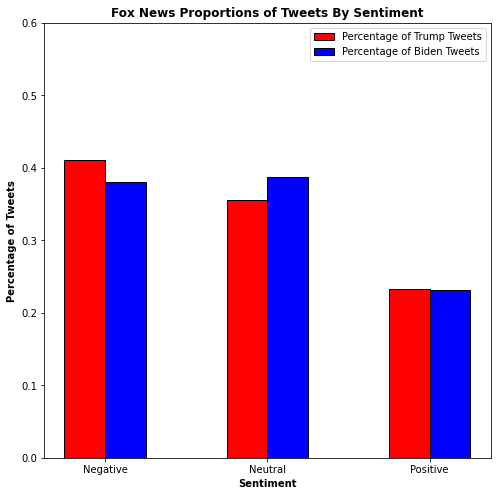

In [94]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_list[0], color ='red', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_list[1], color ='blue', width = bar_width, 
            edgecolor ='black', label ='Biden') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 0.6)
plt.title('Fox News Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

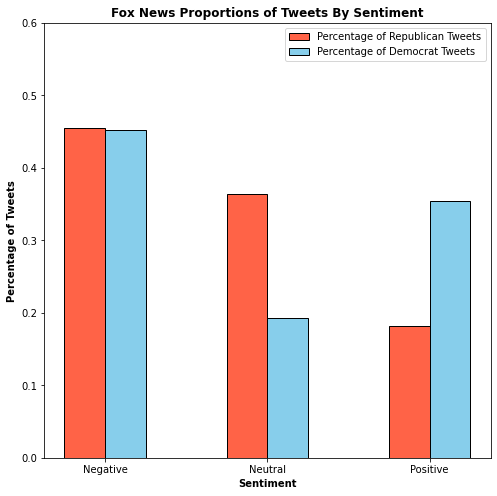

In [96]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

r = plt.bar(br1, prop_list[2], color ='tomato', width = bar_width, 
            edgecolor ='black', label ='Republican') 
d = plt.bar(br2, prop_list[-1], color ='skyblue', width = bar_width, 
            edgecolor ='black', label ='Democrat') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([r,d],['Percentage of Republican Tweets','Percentage of Democrat Tweets'])
plt.ylim(0.0, 0.6)
plt.title('Fox News Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

In [97]:
i = 0
prop_list = [] #trump, biden, rep, dem

for df in washpost_final_data:
    prop = washpost_final_data[i].groupby('sentiment').size()/len(washpost_final_data[i])
    prop_list.append(prop)
    
    i += 1

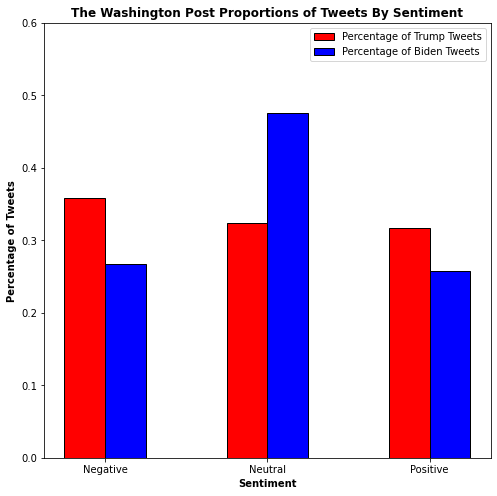

In [99]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_list[0], color ='red', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_list[1], color ='blue', width = bar_width, 
            edgecolor ='black', label ='Biden') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0, 0.6)
plt.title('The Washington Post Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

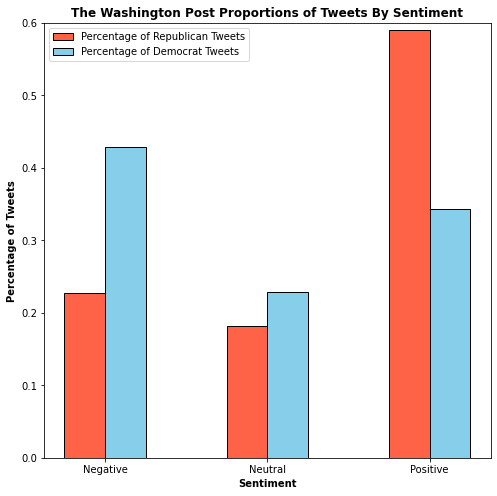

In [100]:
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

r = plt.bar(br1, prop_list[2], color ='tomato', width = bar_width, 
            edgecolor ='black', label ='Republican') 
d = plt.bar(br2, prop_list[-1], color ='skyblue', width = bar_width, 
            edgecolor ='black', label ='Democrat') 

plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Negative','Neutral','Positive'])
plt.legend([r,d],['Percentage of Republican Tweets','Percentage of Democrat Tweets'])
plt.ylim(0.0, 0.6)
plt.title('The Washington Post Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

## IV. Insights and Analysis <a class="anchor" id="fourthpoint"></a>

- In general, it would seem that the common perception of the bias of each news outlet holds true - if one were to look at the sentiment proportions of the Republican/Democrat comparisons, Fox News and The Washington Post speak more positively of the Republican Party, and likewise for CNN and MSNBC for the Democrat Party.
- Mr Trump seems to receive the most amount of social media coverage across all outlets (both positive and negative), as opposed to his political opponent Mr. Biden, as well as either Party in general.
- Another interesting observation is that the liberal-leaning outlets seem to make much more use of social media to get their message out than the conservative ones. This makes sample sizes across time periods somewhat disproportioned.
- When it comes to Fox News, a surprising result was that negative tweets about Mr Trump outweighed the positive. In context, it seems that in the lead-up and aftermath of the election, Fox News ran some unexpectedly negatove cpverage of the sitting President (but not the Republican party in general. In a larger sample size, say perhaps a year's or even the tweets over the span of Mr Trump's presidency, this month-long sample size might register as an anomaly. 